**Importing Libraries**

In [ ]:
import os
import PIL
import numpy as np
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

**Importing Dataset From Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True) 

Mounted at /content/gdrive


In [ ]:
p="/content/gdrive/MyDrive/Colab Notebooks/Agriculture Vision Dataset/New Augmented"
os.chdir(p)
class_count = len(os.listdir(p))
print(class_count)

4


In [ ]:
batch_size=32
image_size=(512,512)

**Splitting The Dataset Into Training And Validation Data**

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Colab Notebooks/Agriculture Vision Dataset/New Augmented",
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/gdrive/MyDrive/Colab Notebooks/Agriculture Vision Dataset/New Augmented" ,
   validation_split=0.1,
   subset="validation",
   seed=123,
   image_size=image_size,
   batch_size=32
) 

Found 8000 files belonging to 4 classes.
Using 7200 files for training.
Found 8000 files belonging to 4 classes.
Using 800 files for validation.


**Importing Resnet50 And Freezing All The Layers**

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model = Sequential()
base_model = ResNet50(input_shape=(512, 512,3), include_top=False, weights=None)
for layer in base_model.layers:
    layer.trainable = False


**Adding A Flattening And 2 Dense Layer And Compiling The Model With SGD optimizer**

In [ ]:
flat = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(flat)
output = layers.Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, output)

model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

**Experiment 1 - Epochs = 10, steps_per_epoch=10(Using The Resnet50 Model With All Layers Frozen)**

In [ ]:
reshist = model.fit(train_ds, validation_data = val_ds, steps_per_epoch = 10, epochs = 10)

Epoch 1/10
10/10 [==============================] - 298s 23s/step - loss: 558225.0088 - accuracy: 0.2856 - val_loss: 22.5522 - val_accuracy: 0.2362
Epoch 2/10
10/10 [==============================] - 79s 8s/step - loss: 13.0885 - accuracy: 0.2433 - val_loss: 27.3059 - val_accuracy: 0.2362
Epoch 3/10
10/10 [==============================] - 77s 8s/step - loss: 9.6320 - accuracy: 0.2484 - val_loss: 2.0802 - val_accuracy: 0.2362
Epoch 4/10
10/10 [==============================] - 74s 8s/step - loss: 4.6895 - accuracy: 0.2328 - val_loss: 4.1502 - val_accuracy: 0.2700
Epoch 5/10
10/10 [==============================] - 76s 8s/step - loss: 1.9774 - accuracy: 0.2602 - val_loss: 1.3858 - val_accuracy: 0.2713
Epoch 6/10
10/10 [==============================] - 74s 8s/step - loss: 9.6501 - accuracy: 0.2582 - val_loss: 1.3857 - val_accuracy: 0.2713
Epoch 7/10
10/10 [==============================] - 76s 8s/step - loss: 2.2056 - accuracy: 0.2423 - val_loss: 2.3513 - val_accuracy: 0.2488
Epoch 8/10

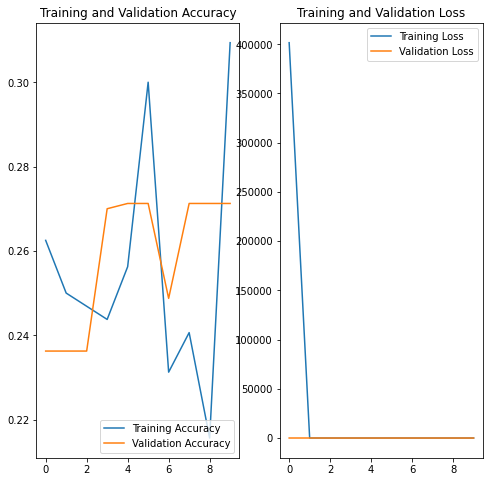

In [ ]:
import matplotlib.pyplot as plt
acc = reshist.history['accuracy']
val_acc = reshist.history['val_accuracy']

loss = reshist.history['loss']
val_loss = reshist.history['val_loss']
epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Experiment 2 - Epochs = 10, steps_per_epoch=20(Using The Resnet50 Model With All Layers Frozen)**

In [ ]:
reshist1 = model.fit(train_ds, validation_data = val_ds, steps_per_epoch = 20, epochs = 10)

Epoch 1/10
20/20 [==============================] - 28s 1s/step - loss: 1.8323 - accuracy: 0.2609 - val_loss: 1.3856 - val_accuracy: 0.2713
Epoch 2/10
20/20 [==============================] - 27s 1s/step - loss: 1.3875 - accuracy: 0.2266 - val_loss: 1.3857 - val_accuracy: 0.2713
Epoch 3/10
20/20 [==============================] - 28s 1s/step - loss: 1.3860 - accuracy: 0.2672 - val_loss: 1.3857 - val_accuracy: 0.2713
Epoch 4/10
20/20 [==============================] - 28s 1s/step - loss: 1.3873 - accuracy: 0.2297 - val_loss: 1.3858 - val_accuracy: 0.2713
Epoch 5/10
20/20 [==============================] - 28s 1s/step - loss: 1.3861 - accuracy: 0.2656 - val_loss: 1.3857 - val_accuracy: 0.2713
Epoch 6/10
20/20 [==============================] - 138s 7s/step - loss: 1.3860 - accuracy: 0.2562 - val_loss: 1.3857 - val_accuracy: 0.2713
Epoch 7/10
20/20 [==============================] - 138s 7s/step - loss: 1.3863 - accuracy: 0.2609 - val_loss: 1.3857 - val_accuracy: 0.2713
Epoch 8/10
20/20 [

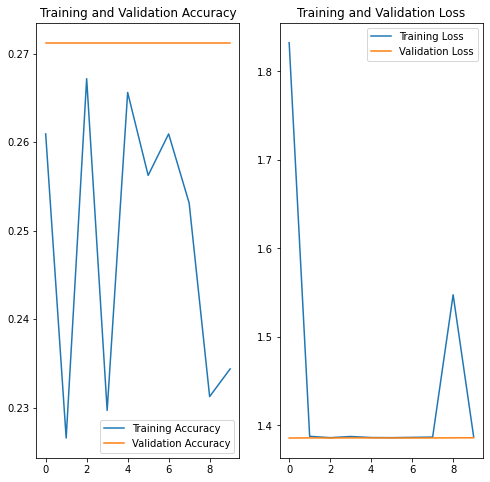

In [ ]:
import matplotlib.pyplot as plt
acc = reshist1.history['accuracy']
val_acc = reshist1.history['val_accuracy']

loss = reshist1.history['loss']
val_loss = reshist1.history['val_loss']
epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Importing Resnet50 Model And Freezing All The Layers Except The Last 12 Layers**

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model2 = Sequential()
base_model2 = ResNet50(input_shape=(512, 512,3), include_top=False, weights=None)
for layer in base_model2.layers[0:-12]:
    layer.trainable = False


**Adding A Flattening And 2 Dense Layer And Compiling The Model With SGD optimizer**

In [ ]:
flat = layers.Flatten()(base_model2.output)
x = layers.Dense(512, activation='relu')(flat)
output = layers.Dense(4, activation='softmax')(x)

model2 = tf.keras.models.Model(base_model2.input, output)

model2.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

**Experiment 3 - Epochs = 10, steps_per_epoch=10(Using The Resnet50 Model With The Last 12 Layer Unfrozen)**

In [ ]:
reshist1 = model2.fit(train_ds, validation_data = val_ds, steps_per_epoch = 10, epochs = 10)

Epoch 1/10
10/10 [==============================] - 23s 2s/step - loss: 1.3447 - accuracy: 0.3625 - val_loss: 1.2769 - val_accuracy: 0.4288
Epoch 2/10
10/10 [==============================] - 22s 2s/step - loss: 1.3198 - accuracy: 0.3562 - val_loss: 1.3049 - val_accuracy: 0.3850
Epoch 3/10
10/10 [==============================] - 22s 2s/step - loss: 1.3043 - accuracy: 0.3688 - val_loss: 1.2856 - val_accuracy: 0.3950
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 1.2484 - accuracy: 0.3594 - val_loss: 1.2655 - val_accuracy: 0.4062
Epoch 5/10
10/10 [==============================] - 22s 2s/step - loss: 1.2643 - accuracy: 0.4187 - val_loss: 1.2858 - val_accuracy: 0.3638
Epoch 6/10
10/10 [==============================] - 22s 2s/step - loss: 1.2602 - accuracy: 0.3906 - val_loss: 1.2542 - val_accuracy: 0.3988
Epoch 7/10
10/10 [==============================] - 22s 2s/step - loss: 1.2803 - accuracy: 0.3562 - val_loss: 1.2876 - val_accuracy: 0.3738
Epoch 8/10
10/10 [==

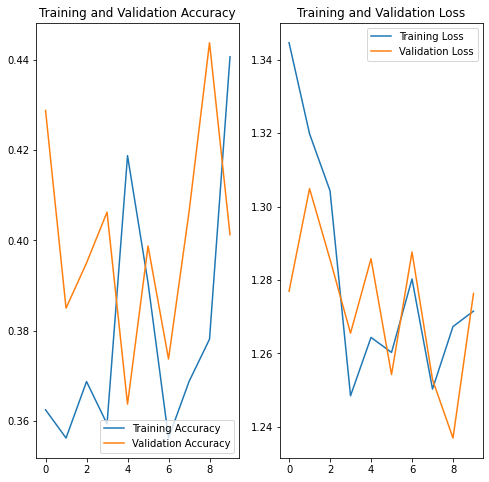

In [ ]:
import matplotlib.pyplot as plt
acc = reshist1.history['accuracy']
val_acc = reshist1.history['val_accuracy']

loss = reshist1.history['loss']
val_loss = reshist1.history['val_loss']
epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Experiment 4 - Epochs = 10, steps_per_epoch=20(Using The Resnet50 Model With The Last 12 Layer Unfrozen)**

In [ ]:
reshist2 = model2.fit(train_ds, validation_data = val_ds, steps_per_epoch = 20, epochs = 10)

Epoch 1/10
20/20 [==============================] - 30s 2s/step - loss: 1.3219 - accuracy: 0.3547 - val_loss: 1.2846 - val_accuracy: 0.3925
Epoch 2/10
20/20 [==============================] - 29s 2s/step - loss: 1.2683 - accuracy: 0.3828 - val_loss: 1.2635 - val_accuracy: 0.3700
Epoch 3/10
20/20 [==============================] - 30s 2s/step - loss: 1.3326 - accuracy: 0.3344 - val_loss: 1.3168 - val_accuracy: 0.3288
Epoch 4/10
20/20 [==============================] - 30s 2s/step - loss: 1.3051 - accuracy: 0.3422 - val_loss: 1.4015 - val_accuracy: 0.3063
Epoch 5/10
20/20 [==============================] - 30s 2s/step - loss: 1.3075 - accuracy: 0.3812 - val_loss: 1.2819 - val_accuracy: 0.3738
Epoch 6/10
20/20 [==============================] - 30s 2s/step - loss: 1.2673 - accuracy: 0.4125 - val_loss: 1.2888 - val_accuracy: 0.3450
Epoch 7/10
20/20 [==============================] - 30s 2s/step - loss: 1.2362 - accuracy: 0.4000 - val_loss: 1.3248 - val_accuracy: 0.3688
Epoch 8/10
20/20 [==

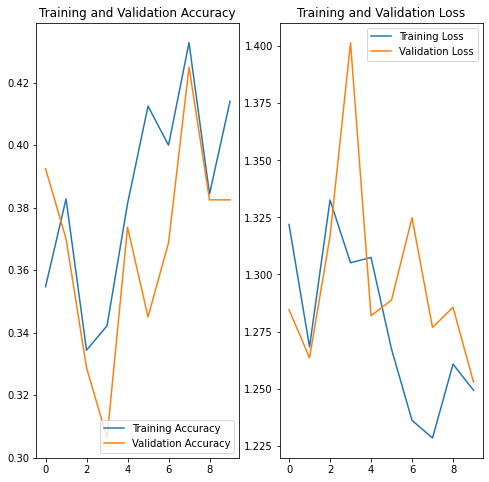

In [ ]:
import matplotlib.pyplot as plt
acc = reshist2.history['accuracy']
val_acc = reshist2.history['val_accuracy']

loss = reshist2.history['loss']
val_loss = reshist2.history['val_loss']
epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Experiment 5 - Epochs = 20, steps_per_epoch=10(Using The Resnet50 Model With The Last 12 Layer Unfrozen)**

In [ ]:
reshist3 = model2.fit(train_ds, validation_data = val_ds, steps_per_epoch = 10, epochs = 20)

Epoch 1/20
10/10 [==============================] - 24s 3s/step - loss: 1.2685 - accuracy: 0.3812 - val_loss: 1.2298 - val_accuracy: 0.4437
Epoch 2/20
10/10 [==============================] - 23s 3s/step - loss: 1.1962 - accuracy: 0.4406 - val_loss: 1.2239 - val_accuracy: 0.4225
Epoch 3/20
10/10 [==============================] - 23s 2s/step - loss: 1.2907 - accuracy: 0.4156 - val_loss: 1.2670 - val_accuracy: 0.4100
Epoch 4/20
10/10 [==============================] - 23s 2s/step - loss: 1.2120 - accuracy: 0.4437 - val_loss: 1.3388 - val_accuracy: 0.3137
Epoch 5/20
10/10 [==============================] - 23s 3s/step - loss: 1.2183 - accuracy: 0.4375 - val_loss: 1.2446 - val_accuracy: 0.4200
Epoch 6/20
10/10 [==============================] - 23s 3s/step - loss: 1.3361 - accuracy: 0.3688 - val_loss: 1.3089 - val_accuracy: 0.3775
Epoch 7/20
10/10 [==============================] - 23s 2s/step - loss: 1.3169 - accuracy: 0.3344 - val_loss: 1.2745 - val_accuracy: 0.3663
Epoch 8/20
10/10 [==

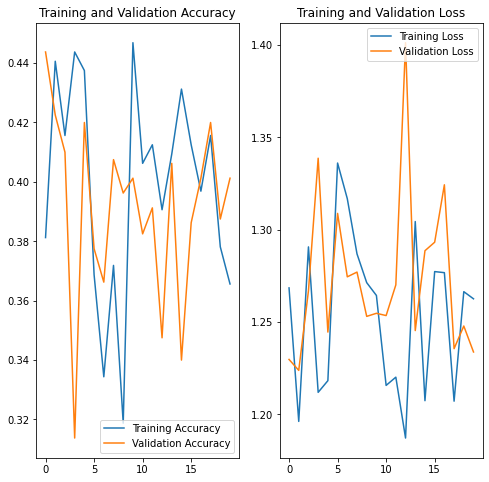

In [ ]:
import matplotlib.pyplot as plt
acc = reshist3.history['accuracy']
val_acc = reshist3.history['val_accuracy']

loss = reshist3.history['loss']
val_loss = reshist3.history['val_loss']
epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()